C:\Users\TEMP\AppData\Local\Temp\ipykernel_7160\4246686562.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data['created_at'] = pd.to_datetime(combined_data['created_at'])


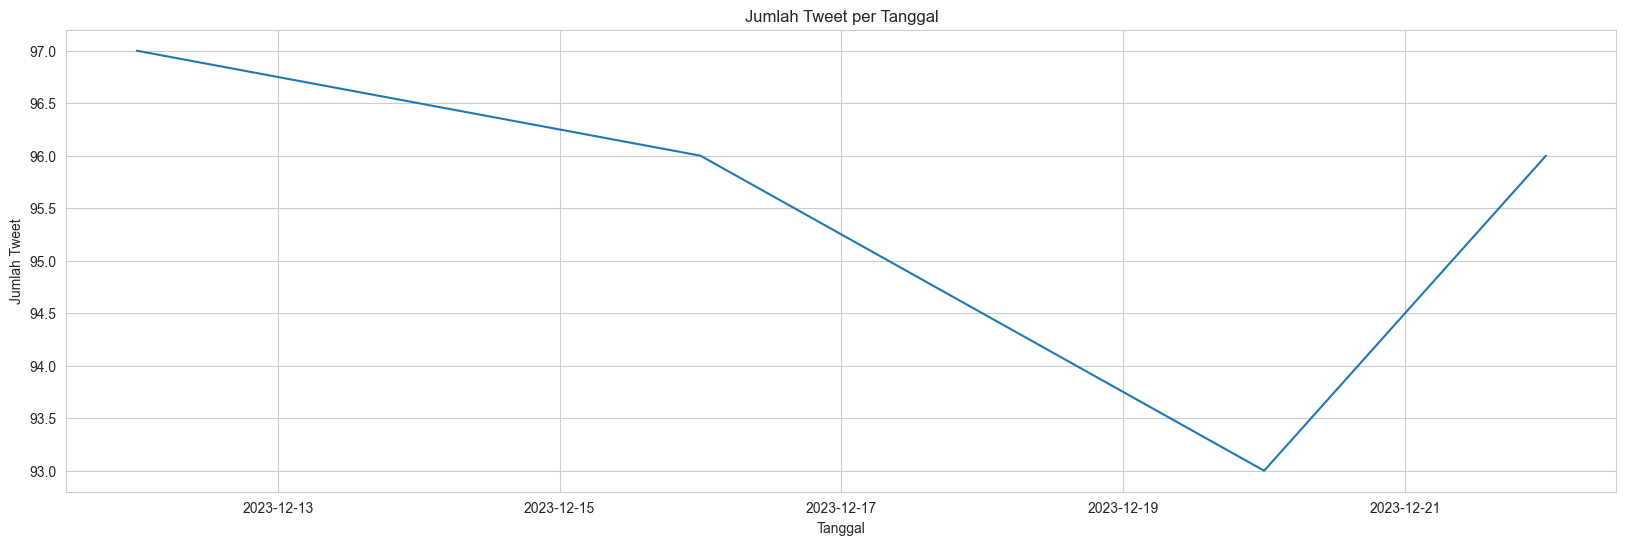

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def calculate_tweet_stats(input_directory, output_file):
    # Create an empty list to hold DataFrames
    data_frames = []

    for filename in os.listdir(input_directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(input_directory, filename)
            df = pd.read_csv(file_path)
            data_frames.append(df)

    # Concatenate all DataFrames in the list
    combined_data = pd.concat(data_frames, ignore_index=True)

    # Remove duplicates based on all columns
    combined_data = combined_data.drop_duplicates()

    # Convert 'created_at' column to datetime format
    combined_data['created_at'] = pd.to_datetime(combined_data['created_at'])

    # Calculate the total number of tweets
    total_tweets = len(combined_data)

    # Determine the time range
    start_time = combined_data['created_at'].min()
    end_time = combined_data['created_at'].max()
    time_range = end_time - start_time

    # Save the combined data to a CSV file
    combined_data.to_csv(output_file, index=False)

    # Return the results
    return total_tweets, start_time, end_time, time_range, combined_data

# Example usage:
input_directory = "../tweets-data"
output_file = "../tweets-data/Combined-File/combined.csv"
total_tweets, start_time, end_time, time_range, combined_data = calculate_tweet_stats(input_directory, output_file)

# Convert the 'created_at' column to datetime with the appropriate format
combined_data['created_at'] = pd.to_datetime(combined_data['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Calculate the count of tweets per date
grouped = combined_data.groupby(combined_data['created_at'].dt.date).size().reset_index(name='count tweet')

# Set seaborn style
sns.set_style("whitegrid")

# Create a line plot using seaborn
plt.figure(figsize=(20, 6))
sns.lineplot(data=grouped, x='created_at', y='count tweet', markers='o')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Tweet')
plt.title('Jumlah Tweet per Tanggal')
plt.xticks(rotation=0)
plt.show()


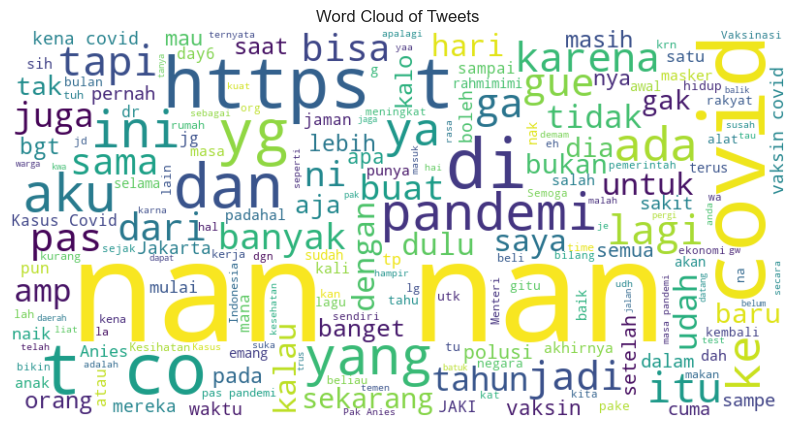

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the CSV file into a DataFrame
file_path = "../tweets-data/Combined-File/combined.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Convert 'full_text' column to strings and handle NaN values
df['full_text'] = df['full_text'].astype(str)

# Combine all tweets' text into one string
combined_text = ' '.join(df['full_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Tweets')
plt.show()
